# 7. Stationarity

Understanding stationarity and differencing is fundamental when working with time series data. Stationarity is a key assumption in many time series models, as it simplifies the analysis and makes predictions more reliable. Differencing is a common technique used to achieve stationarity in non-stationary time series data.
**Stationarity** refers to a time series whose statistical properties, such as mean, variance, and autocorrelation, ***do not change over time***. In simpler terms, a stationary time series has a constant statistical behavior across different time periods. Many time series forecasting methods assume stationarity to make predictions.




## 7.1 How to make a time series stationary

1. **Plotting**: Start by visualizing your time series data using line plots, histograms, or other relevant plots. Look for any obvious trends, seasonality, or irregularities.

2. **Statistical Tests**: Use statistical tests like the Augmented Dickey-Fuller (ADF) test to check for stationarity. The null hypothesis of the ADF test is that the time series is non-stationary. If the p-value is below a certain threshold, you can reject the null hypothesis and consider the time series as stationary.

3. **Differencing**: If the time series is not stationary, you can make it stationary by differencing. This involves subtracting the previous value from the current value.

4. **Seasonal Decomposition**: If there is a clear seasonal component in your data, you can decompose the time series into its trend, seasonal, and residual components. This helps in identifying and removing seasonality.



### 7.1.1 Differencing and its Importance

**Differencing** is a technique used to transform a non-stationary time series into a stationary one. It involves subtracting a lagged version of the time series from itself. The order of differencing (i.e., how many lag values to subtract) depends on the data.

#### Example Code

Let's illustrate these concepts with Python code using a sample time series dataset.

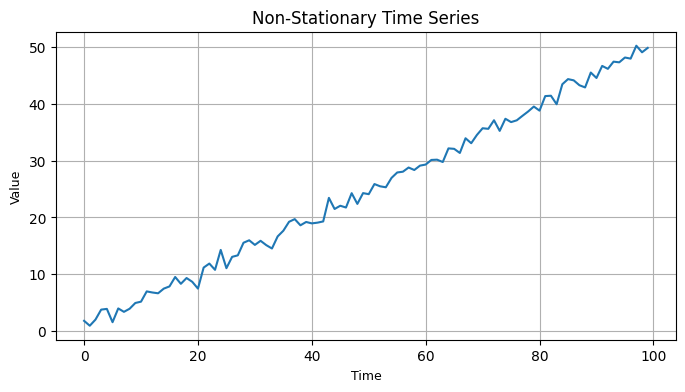

ADF p-value: 0.998736655331758


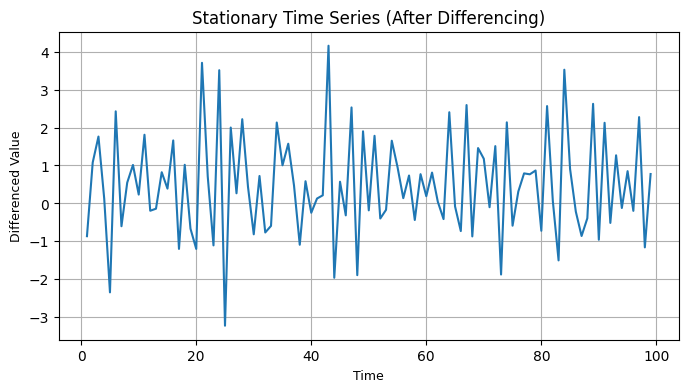

ADF p-value after differencing: 2.434315814195165e-06


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate a non-stationary time series
np.random.seed(0)
n = 100
time = np.arange(n)
data = 0.5 * time + np.random.randn(n)

# Plot the original time series
plt.figure(figsize=(8, 4))  # Adjust figure size as per your preference
plt.plot(time, data)
plt.title("Non-Stationary Time Series", fontsize=12)  # Adjust title font size
plt.xlabel("Time", fontsize=9)  # Adjust x-axis label font size
plt.ylabel("Value", fontsize=9)  # Adjust y-axis label font size
plt.grid(True)  # Add grid

plt.show()

# Check stationarity using ADF test
adf_result = adfuller(data)
p_value = adf_result[1]
print(f"ADF p-value: {p_value}")

# Perform differencing to make it stationary
data_diff = np.diff(data, 1)  # First-order differencing

# Plot the differenced time series
plt.figure(figsize=(8, 4))  # Adjust figure size as per your preference
plt.plot(time[1:], data_diff)
plt.title("Stationary Time Series (After Differencing)", fontsize=12)  # Adjust title font size
plt.xlabel("Time", fontsize=9)  # Adjust x-axis label font size
plt.ylabel("Differenced Value", fontsize=9)  # Adjust y-axis label font size
plt.grid(True)  # Add grid

plt.show()

# Check stationarity of the differenced series
adf_result_diff = adfuller(data_diff)
p_value_diff = adf_result_diff[1]
print(f"ADF p-value after differencing: {p_value_diff}")



In this example, we first create a non-stationary time series with a linear trend and random noise. We then use the Augmented Dickey-Fuller test to check for stationarity. Since the p-value is high, we conclude that the original series is non-stationary.

Next, we perform first-order differencing on the time series, creating a new series. We visualize this differenced series and again use the ADF test to check for stationarity. The lower p-value suggests that the differenced series is now stationary, which is a desirable property for time series analysis.

Keep in mind that the order of differencing may vary depending on your specific dataset, and you may need to apply further transformations if seasonality is present. Time series analysis often involves experimentation to find the best approach for your data.

### 7.1.2 Seasonal Decomposition

**Seasonal decomposition** involves separating a time series into its constituent components: trend, seasonal, and residual (or error) components. By removing the trend and seasonality, you can work with the residual component, which should ideally be stationary.

We'll use Python and the `statsmodels` library to perform seasonal decomposition on a sample time series dataset.

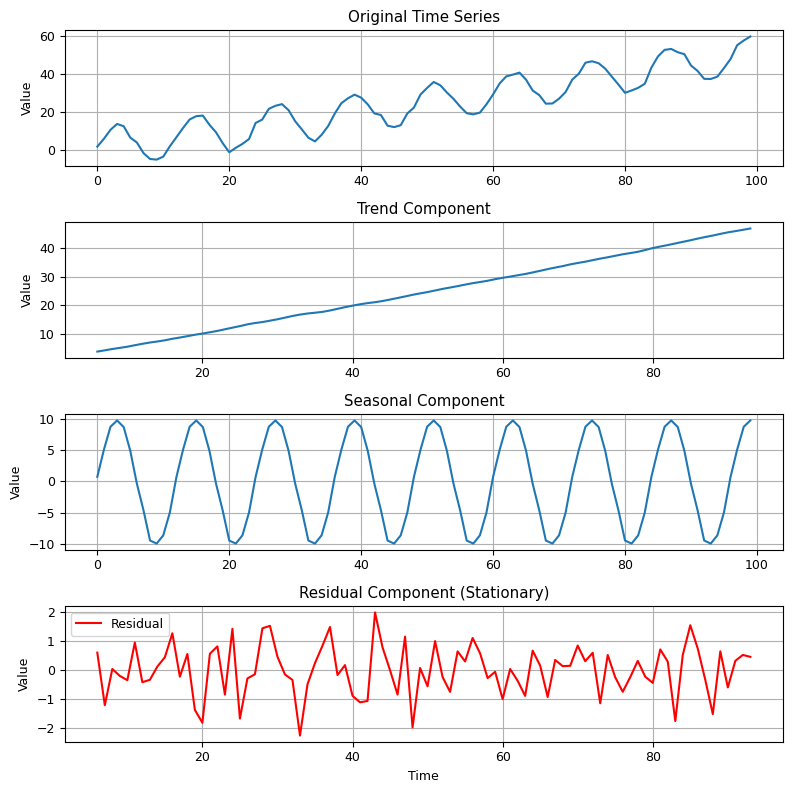

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a non-stationary time series with seasonality
np.random.seed(0)
n = 100
time = np.arange(n)
data = 0.5 * time + 10 * np.sin(2 * np.pi * time / 12) + np.random.randn(n)

# Set font size
plt.rcParams.update({'font.size': 9})

# Perform seasonal decomposition
result = seasonal_decompose(data, model='additive', period=12)  # 12 for monthly data

# Plot the decomposed components
plt.figure(figsize=(8, 8))  # Adjust figure size as per your preference

plt.subplot(4, 1, 1)
plt.plot(time, data, label='Original')
plt.title("Original Time Series")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time, result.trend, label='Trend')
plt.title("Trend Component")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time, result.seasonal, label='Seasonal')
plt.title("Seasonal Component")
plt.ylabel("Value")
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time, result.resid, label='Residual', color='red')
plt.title("Residual Component (Stationary)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()




In this example, we generate a non-stationary time series with both a linear trend and seasonality. We then perform seasonal decomposition using the `seasonal_decompose` function from `statsmodels`. We specify the `model` as 'additive' since we assume that the components add up to the observed series. The `period` parameter is set to 12 because the data is assumed to have monthly seasonality.

We visualize the original time series along with its decomposed components: trend, seasonal, and residual. The goal is to make the residual component (bottom subplot) stationary. You can further analyze and model this stationary residual component for forecasting or analysis.

Remember that the choice of the decomposition model and period may vary depending on your specific dataset and domain knowledge. Seasonal decomposition is particularly useful for handling time series data with strong seasonal patterns.